# Convolution on Image
* a basic convolution on a 2D Grey Scale image.
* a filter with 3x3 array 

In [1]:
import cv2
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
print(cv2.__version__)

3.4.2


In [3]:
# load 'ascent' image
img_org = misc.ascent()
print(img_org.shape)

(512, 512)


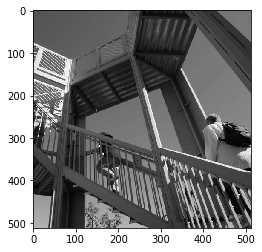

In [4]:
plt.gray()
#plt.axis('off')
plt.imshow(img_org);

## Covolution
Convolution is the process of adding each element of the image to its local neighbors, weighted by the kernel. This is related to a form of mathematical convolution. The matrix operation being performed—convolution—is not traditional matrix multiplication, despite being similarly denoted by "*".

For example, if we have two three-by-three matrices, the first a kernel, and the second an image piece, convolution is the process of flipping both the rows and columns of the kernel and then multiplying locally similar entries and summing. The element at coordinates [2, 2] (that is, the central element) of the resulting image would be a weighted combination of all the entries of the image matrix, with weights given by the kernel:
![Convolution](img/convolution.png)

In [5]:
def apply_filter(img, filter, weight=1, render=True):
    sx, sy = img.shape
    img_filtered = np.copy(img)
    for x in range(1, sx - 1):
        for y in range(1, sy - 1):
            convolution = 0.0
            convolution = convolution + (img[x+1, y+1] * filter[0][0])
            convolution = convolution + (img[x+1, y] * filter[0][1])
            convolution = convolution + (img[x+1, y-1] * filter[0][2])
            convolution = convolution + (img[x, y+1] * filter[1][0])
            convolution = convolution + (img[x, y] * filter[1][1])
            convolution = convolution + (img[x, y-1] * filter[1][2])
            convolution = convolution + (img[x-1, y+1] * filter[2][0])
            convolution = convolution + (img[x-1, y] * filter[2][1])
            convolution = convolution + (img[x-1, y-1] * filter[2][2])
            convolution = convolution * weight
            if(convolution < 0):
                convolution = 0
            if(convolution > 255):
                convolution = 255
            img_filtered[x, y] = convolution
    if render:
        plt.gray()
        plt.imshow(img_filtered)
    return img_filtered

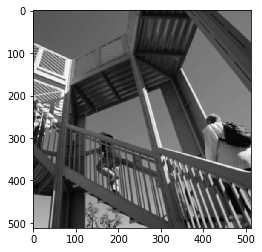

In [6]:
filter = [[1, 1, 1], [1, 1, 1], [1, 1, 1]]
img_filtered = apply_filter(img_org, filter, 1/9.0)

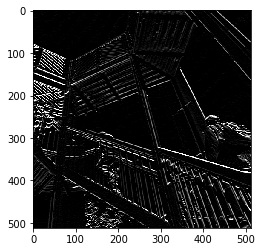

In [7]:
filter = [[-1, -2, -1], [0, 0, 0], [1, 2, 1]]
img_filtered = apply_filter(img_org, filter)

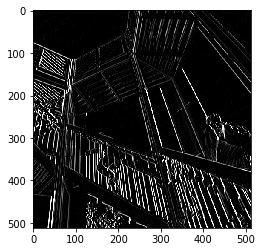

In [8]:
filter = [[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]
img_filtered = apply_filter(img_org, filter)

## Max Pooling
* (2, 2) pooling

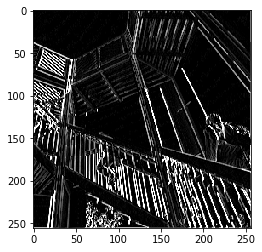

In [9]:
size_x, size_y = img_filtered.shape
new_x = int(size_x/2)
new_y = int(size_y/2)
new_image = np.zeros((new_x, new_y))
for x in range(0, size_x, 2):
    for y in range(0, size_y, 2):
        pixels = []
        pixels.append(img_filtered[x, y])
        pixels.append(img_filtered[x+1, y])
        pixels.append(img_filtered[x, y+1])
        pixels.append(img_filtered[x+1, y+1])
        new_image[int(x/2), int(y/2)] = max(pixels)

plt.gray()
plt.imshow(new_image);